Monday, 28th October 2019 -- Biko Pougala

This notebook is concerned with generate cumulative distribution functions, both Gaussian and Poisson, that could be used in order to generate copulas.

In [11]:
from scipy.stats import multivariate_normal, norm, poisson
import numpy as np
import matplotlib.pyplot as plt

What we wish to accomplish is generate a Gaussian copula from artificially generated data. In order to do that we'll follow the following steps:

1) Generate a multivariate normal distribution  
2) Get the cumulative distribution at every point  
3) Get the inverse of the CDF to get the points X 

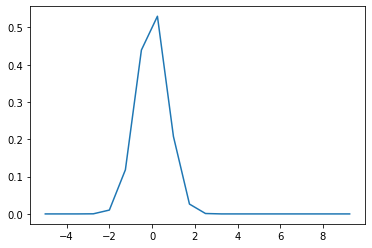

In [2]:
#Generate the multivariate normal distribution using SciPy

x = np.linspace(-5, 10, 20, endpoint=False)
y = multivariate_normal.pdf(x, mean=0, cov=0.5)
plt.plot(x, y)

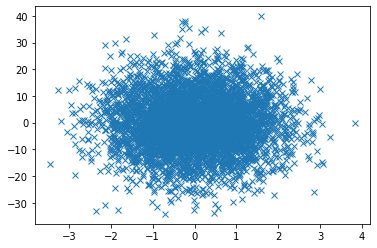

In [41]:
# Generate the multivariate normal distribution using Numpy (multidimensional case)
mean = [0, 0]
cov = [[1, 0], [0, 100]]
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')

In [18]:
# Step 2: Compute the CDF using scipy.stats
v = norm()
stats_cdf = v.cdf(y)
print(stats_cdf)

[9.97582188e-01 8.55787471e-01 9.99962419e-01 ... 5.97259249e-02
 1.46383070e-15 1.20320987e-08]


Following the MATLAB documentation for generating multivariate random data with deep and complex dependencies between each other, we start by generating 1000 random data points drawn from a normal distribution with parameters 0 and 1. 

In [7]:
arr = np.random.normal(0, 1, 10000)

Plotting a histogram of the generated points gives:

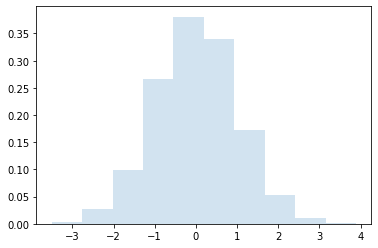

In [8]:
fig, ax = plt.subplots(1, 1)
ax.hist(arr, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

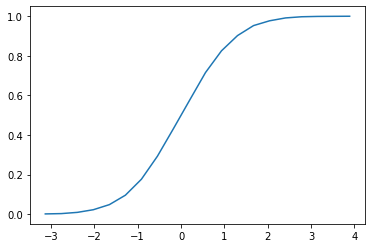

In [10]:
# Computing the CDF visually using numpy and matplotlib
num_bins = 20
counts, bin_edges = np.histogram (arr, bins=num_bins)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])

There are 2 ways to compute the cumulative distribution function of a probability distribution. This prompts an analytical approach to compare the two and determine which one is the optimal one in our case. For now, I choose to use the approach using Matplotlib as it directly uses the mathematical definition of a CDF instead of a built-in Python method. 
The next step is to generate the inverse CDF of the Poisson and apply it to the normal distributions. 

In [29]:
poiss = poisson.ppf(stats_cdf, 0.6)
arr_poisson = np.array(poiss)
print(arr_poisson)
print("Shape of the X found: " + str(arr_poisson.shape))

[4. 1. 6. ... 0. 0. 0.]
Shape of the X found: (5000,)


This is satisfying, less package it into a Python function and then call it:

In [49]:
def generatePoints(mean, cov):
    shape = mean.shape[0]
    y = np.random.multivariate_normal(mean, cov, shape).T
    v = norm()
    stats_cdf = v.cdf(y)
    mean_val = np.mean(stats_cdf)
    poiss = poisson.ppf(stats_cdf, mean_val)
    arr_poisson = np.array(poiss)
    return arr_poisson

In [85]:
from scipy import random, linalg
matrixSize = 100
temp_cov = random.randint(30, size=(matrixSize,matrixSize)) 
cov_matrix = np.dot(temp_cov,temp_cov.transpose())
mean_arr = random.randint(30, size=(matrixSize,)) 
generatePoints(mean_arr, cov_matrix)

array([[-1., inf, inf, ..., inf, -1., -1.],
       [-1., inf, inf, ..., inf, inf, -1.],
       [-1., -1., inf, ..., inf, -1., -1.],
       ...,
       [-1., inf, inf, ...,  2., inf, -1.],
       [-1., inf, inf, ..., inf, inf,  0.],
       [-1., inf, inf, ..., inf, -1.,  0.]])

In [86]:
matrixSize = 100
temp_cov = random.randn(matrixSize,matrixSize) # populates array with random floats from standard normal dist.
cov_matrix = np.dot(temp_cov,temp_cov.transpose())
mean_arr = random.randn(matrixSize,) 
generatePoints(mean_arr, cov_matrix)

array([[ 3.,  0.,  0., ..., inf,  0.,  0.],
       [inf,  0., inf, ...,  6.,  2., 11.],
       [ 0.,  0., inf, ...,  3., inf,  0.],
       ...,
       [ 0.,  0.,  0., ..., inf,  0.,  1.],
       [inf,  0., inf, ...,  1.,  0.,  0.],
       [ 9.,  0.,  0., ...,  0.,  0.,  0.]])

In [87]:
matrixSize = 100
temp_cov = random.rand(matrixSize,matrixSize) # populates array uniformly with random floats between 0 and 1
cov_matrix = np.dot(temp_cov,temp_cov.transpose())
mean_arr = random.rand(matrixSize,) 
generatePoints(mean_arr, cov_matrix)

array([[ 9.,  0.,  0., ...,  0.,  1.,  0.],
       [ 3.,  6.,  0., ...,  0.,  6., 13.],
       [13., 11.,  0., ...,  2.,  2.,  2.],
       ...,
       [ 9.,  5.,  0., ...,  1.,  0.,  1.],
       [ 1.,  1.,  0., ...,  0.,  0.,  6.],
       [10.,  0.,  0., ...,  0.,  3.,  2.]])